In [3]:
# read libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from scipy import stats
# select different feature size and run cross validation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [4]:
# use all feature we have
train_data = pd.read_csv("training_data.csv")
X = train_data.iloc[:, :-1]
Y = train_data.iloc[:, -1]
# normalize data before regression
X = preprocessing.scale(X)
c = [0.0001, 0.01, 1, 100]
logreg_all = LogisticRegressionCV(penalty='l2', solver='sag', Cs=c, refit=True, cv=10, max_iter=100)
logreg_all.fit(X, Y)
logreg_all.score(X, Y)
y_scores = logreg_all.predict(X)
y_true = Y
print('The accuracy on training data set is ', logreg_all.score(X, Y))
print('The AUC is on training data set is', roc_auc_score(y_true, y_scores))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The accuracy on training data set is  0.763928234183
The AUC is on training data set is 0.715375810925


In [5]:
# test on testing dataset
test_data = pd.read_csv("testing_data.csv")
X = test_data.iloc[:, :-1]
Y = test_data.iloc[:, -1]
# normalize data before regression
X = preprocessing.scale(X)
y_scores = logreg_all.predict(X)
y_true = Y
print('The accuracy on testing dataset is ', logreg_all.score(X, Y))
print('The AUC on testing dataset is ', roc_auc_score(y_true, y_scores))

The accuracy on testing dataset is  0.675477239354
The AUC on testing dataset is  0.617075197245


In [6]:
# select the 40 features by F value
train_data = pd.read_csv("training_data.csv")
X = train_data.iloc[:, :-1]
Y = train_data.iloc[:, -1]
X = preprocessing.scale(X)
# selece feature based on f_classif
X_new = SelectKBest(f_classif, k=40)
X_new.fit_transform(X, Y)
X = X[:, X_new.get_support()]
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
logreg_40 = LogisticRegressionCV(penalty='l2', solver='sag', Cs=c, refit=True, cv=10, max_iter=1000)
logreg_40.fit(X, Y)
print("The accuracy rate in training set is ", logreg_40.score(X, Y))
y_scores = logreg_40.predict(X)
y_true = Y
print("The AUC score on training dataset is ", roc_auc_score(y_true, y_scores))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The accuracy rate in training set is  0.706011960969
The AUC score on training dataset is  0.639797099588


In [7]:
# test on testing dataset
test_data = pd.read_csv("testing_data.csv")
X = test_data.iloc[:, :-1]
Y = test_data.iloc[:, -1]
# normalize data before regression
X = preprocessing.scale(X)
X = X[:, X_new.get_support()]
y_scores = logreg_40.predict(X)
y_true = Y
print('The accuracy on testing dataset is ', logreg_40.score(X, Y))
print('The AUC on testing dataset is ', roc_auc_score(y_true, y_scores))

The accuracy on testing dataset is  0.665198237885
The AUC on testing dataset is  0.602746732643


In [8]:
# manually select the feature we think important from 40 features
train_data = pd.read_csv("training_data.csv")
X = train_data.loc[:, ['at103s', 'bc03s', 'bc36s', 'br03s', 'br36s', 'g051s', 'g215a', 'g215b',
                        'g224c', 'g230s', 'g251b', 'g304s', 'g305s', 'g311s', 're03s', 're24s',
                        's062s', 's068b', 's071b', 's073b', 'trv01', 'cv13']]
Y = train_data.iloc[:, -1]
X = preprocessing.scale(X)
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
logreg_manual = LogisticRegressionCV(penalty='l2', solver='sag', Cs=c, refit=True, cv=10, max_iter=1000)
logreg_manual.fit(X, Y)
print("The accuracy rate on training set is ", logreg_manual.score(X, Y))
y_scores = logreg_manual.predict(X)
y_true = Y
print("The AUC score on training set is ", roc_auc_score(y_true, y_scores))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The accuracy rate on training set is  0.674220963173
The AUC score on training set is  0.580346419782


In [9]:
# test on testing dataset
test_data = pd.read_csv("testing_data.csv")
X = test_data.loc[:, ['at103s', 'bc03s', 'bc36s', 'br03s', 'br36s', 'g051s', 'g215a', 'g215b',
                        'g224c', 'g230s', 'g251b', 'g304s', 'g305s', 'g311s', 're03s', 're24s',
                        's062s', 's068b', 's071b', 's073b', 'trv01', 'cv13']]
Y = test_data.iloc[:, -1]
# normalize data before regression
X = preprocessing.scale(X)
y_scores = logreg_manual.predict(X)
y_true = Y
print('The accuracy on testing dataset is ', logreg_manual.score(X, Y))
print('The AUC on testing dataset is ', roc_auc_score(y_true, y_scores))

The accuracy on testing dataset is  0.638766519824
The AUC on testing dataset is  0.552130754472


In [10]:
# using all data we have
# use all feature we have
train_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("testing_data.csv")
combined_data = train_data.append(test_data)
X = combined_data.iloc[:, :-1]
Y = combined_data.iloc[:, -1]
# normalize data before regression
X = preprocessing.scale(X)
logreg_all = LogisticRegression(penalty='l2')
logreg_all.fit(X, Y)
logreg_all.score(X, Y)
y_scores = logreg_all.predict(X)
y_true = Y
print('The accuracy on all dataset is ', logreg_all.score(X, Y))
print('The AUC is on all dataset is', roc_auc_score(y_true, y_scores))

The accuracy on all dataset is  0.790923110817
The AUC is on all dataset is 0.757044419471


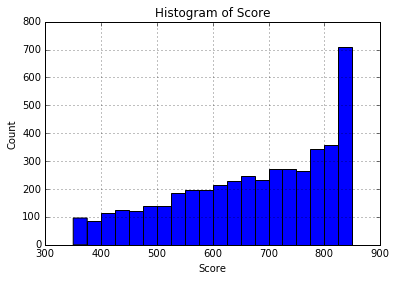

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
# use the best predictor to transfer from raw pd to score
prob_x = logreg_all.predict_proba(X)
# linear transfer
score_x = 350 + 500 * prob_x[:, 0]
plt.hist(score_x, bins=20)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Histogram of Score')
plt.grid(True)
plt.show()

In [12]:
# use all data we have to train the model
logreg_ucla_score = LogisticRegression(penalty='l2')
X = score_x.reshape(-1, 1)
logreg_ucla_score.fit(X, Y)
y_scores = logreg_ucla_score.predict(X)
y_true = Y
print('The accuracy on all dataset is ', logreg_ucla_score.score(X, Y))
print('The AUC is on all dataset is', roc_auc_score(y_true, y_scores))

The accuracy on all dataset is  0.790702797973
The AUC is on all dataset is 0.756327472137


In [17]:
# seperate score into group to plot the pd and score graph
train_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("testing_data.csv")
combined_data = train_data.append(test_data)
combined_data.reset_index(inplace=True)
Y = combined_data.iloc[:, -1]
score = pd.DataFrame(data=score_x, columns=['score'])
table = pd.concat([score, Y], axis=1, join_axes=[score.index])

sequece = list(range(350, 850, 25))
labels = [ i for i in range(0, 21) ]
table.loc[:, 'group'] = pd.cut(table.loc[:, 'score'], range(350, 900, 25), right=False, labels=labels)
defaulting = np.zeros((21))
nondefaulting = np.zeros((21))
for i in range(table.shape[0]):
    if table.loc[i, 'default'] == 1:
        defaulting[table.loc[i, 'group']] += 1
    if table.loc[i, 'default'] == 0:
        nondefaulting[table.loc[i, 'group']] += 1

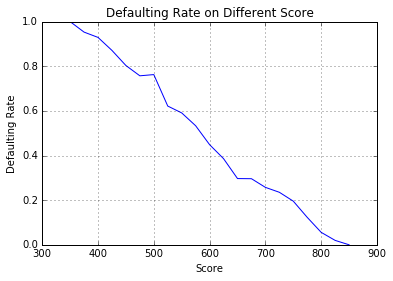

In [18]:
# calculating real defaulting rate for different score
default_rate = defaulting / (defaulting + nondefaulting)
plt.plot(range(350, 875, 25), default_rate)
plt.xlabel('Score')
plt.ylabel('Defaulting Rate')
plt.title('Defaulting Rate on Different Score')
plt.grid(True)
plt.show()

In [44]:
# seperate score into group to plot the pd and score graph
train_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("testing_data.csv")
combined_data = train_data.append(test_data)
combined_data.reset_index(inplace=True)
Y = combined_data.iloc[:, -1]
score = pd.DataFrame(data=score_x, columns=['score'])
table = pd.concat([score, Y], axis=1, join_axes=[score.index])

sequece = list(range(350, 850, 25))
labels = [ i for i in range(0, 21) ]
table.loc[:, 'group'] = pd.cut(table.loc[:, 'score'], range(350, 900, 25), right=False, labels=labels)

# KS score
good_count = np.zeros((21))
bad_count = np.zeros((21))
for i in range(table.shape[0]):
    if table.loc[i, 'default'] == 1:
        bad_count[table.loc[i, 'group']] += 1
    if table.loc[i, 'default'] == 0:
        good_count[table.loc[i, 'group']] += 1


In [61]:
bad_count = bad_count / sum(bad_count)
good_count = good_count / sum(good_count)
cul_bad = np.cumsum(bad_count)
cul_good = np.cumsum(good_count)
ks = cul_bad - cul_good
print("KS value is ", max(ks))

KS value is  0.538881612857


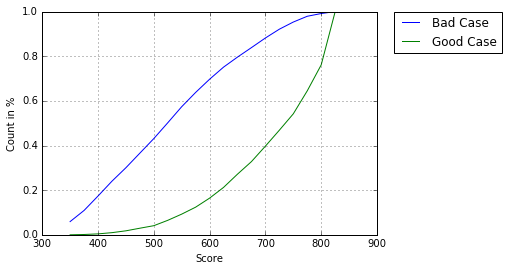

In [64]:
# calculate culmalative default rate
plt.plot(range(350, 851, 25), cul_bad, label="Bad Case")
plt.plot(range(350, 851, 25), cul_good, label="Good Case")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Score')
plt.ylabel('Count in %')
plt.grid(True)
plt.show()